In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/heart_disease.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Dataset Overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


### But the given vaiable and thier Data Types are given in the original data set are as below

| Variable Name | Type             |
| ------------- | ---------------- |
| age           | Integer          |
| sex           | Categorical      |
| cp            | Categorical      |
| trestbps      | Integer          |
| chol          | Integer          |
| fbs           | Categorical      |
| restecg       | Categorical      |
| thalach       | Integer          |
| exang         | Categorical      |
| oldpeak       | Integer          |
| slope         | Categorical      |
| ca            | Integer          |
| thal          | Categorical      |
| num           | Integer (Target) |


#### --> from the df.info() it is observed that, the variabels 'ca' & 'thal' are Objecctive dtypes but the original dtypes are Integer and Categorical types respectively.

#### --> Therefore it is observed taht those variables contain characters.

#### ==> Let us find

In [3]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [4]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

#### --> From the above we can see that both ca and thal contain special character ?. We need to replace this with appropriate data.


#### --> replace "?" with "np.nan"

In [5]:
import numpy as np
df.replace('?', np.nan, inplace=True)

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', nan], dtype=object)

#### --> Impute missing values

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df[["ca", "thal"]] = imputer.fit_transform(df[["ca", "thal"]])


In [9]:
df['ca'].unique()

array([0., 3., 2., 1.])

In [10]:
df['thal'].unique()

array([6., 3., 7.])

#### --> Now correct the entire data set 'dtypes'

#### Explicitly define schema

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
INTEGER_COLS = [
    "age", "trestbps", "chol", "thalach",
    "oldpeak", "ca", "target"
]

CATEGORICAL_COLS = [
    "sex", "cp", "fbs", "restecg",
    "exang", "slope", "thal"
]


#### Convert to correct dtypes (Integers → int)

In [15]:
df[INTEGER_COLS] = df[INTEGER_COLS].astype(int)


#### Convert to correct dtypes ( Categoricals → category dtype )

In [16]:
df[CATEGORICAL_COLS] = df[CATEGORICAL_COLS].astype("category")


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int32   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int32   
 4   chol      303 non-null    int32   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int32   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    int32   
 10  slope     303 non-null    category
 11  ca        303 non-null    int32   
 12  thal      303 non-null    category
 13  target    303 non-null    int32   
dtypes: category(7), int32(7)
memory usage: 11.4 KB


### Check Class Balance 


In [18]:
df['target'].unique()

array([0, 2, 1, 3, 4])

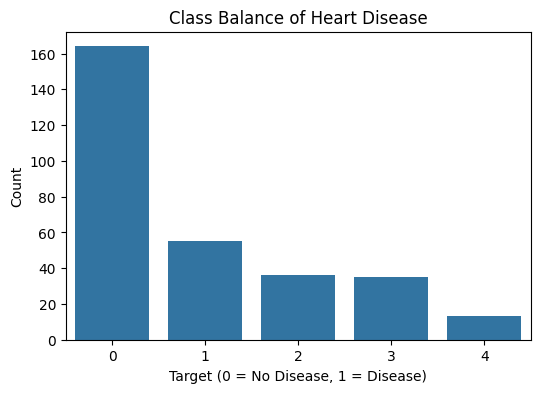

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Class Balance of Heart Disease")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


#### Numerical Feature Distributions

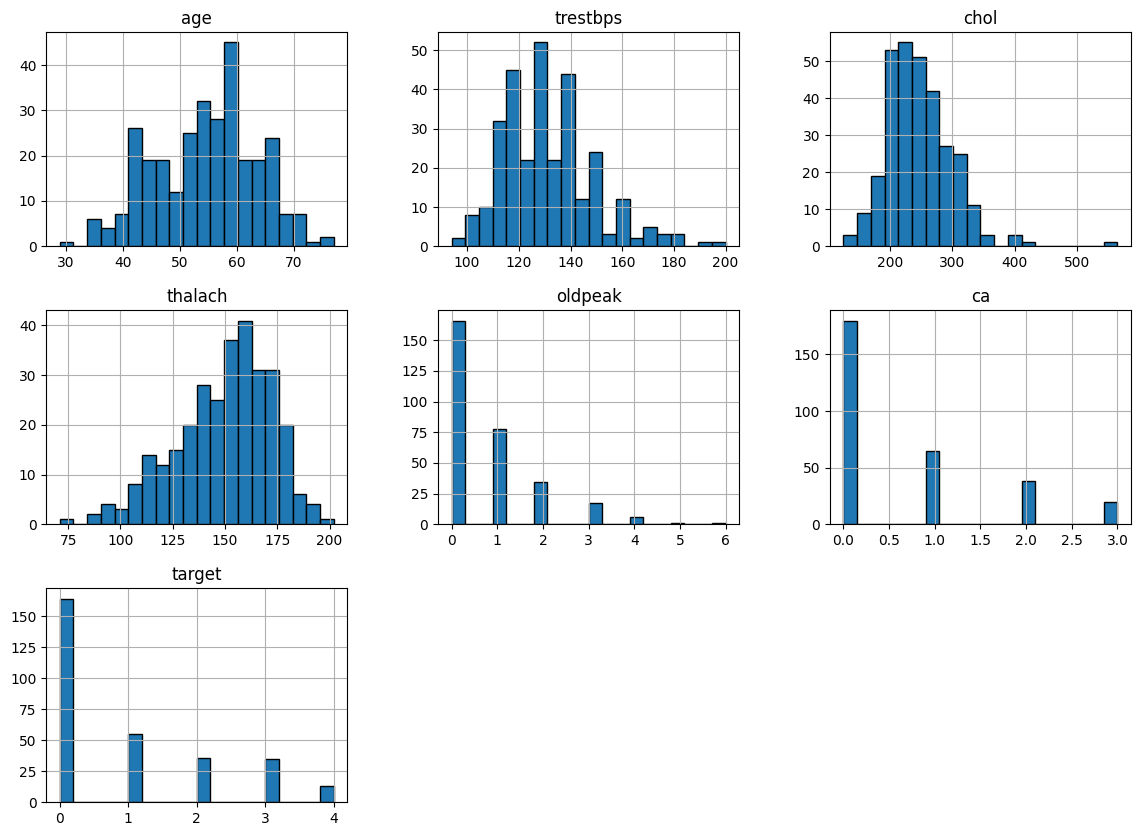

<Figure size 640x480 with 0 Axes>

In [20]:

df[INTEGER_COLS].hist(
    figsize=(14,10),
    bins=20,
    
    edgecolor="black"
)

sns.histplot(data=df[INTEGER_COLS], kde=True)
plt.show()
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()

#### Categorical Feature Distributions

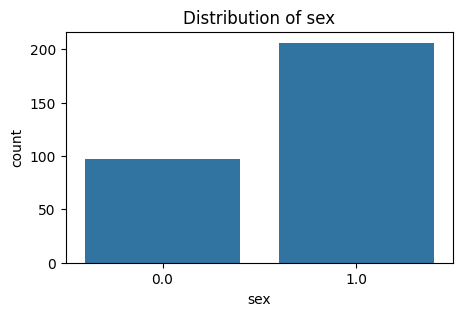

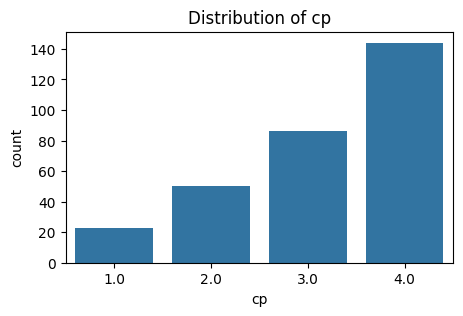

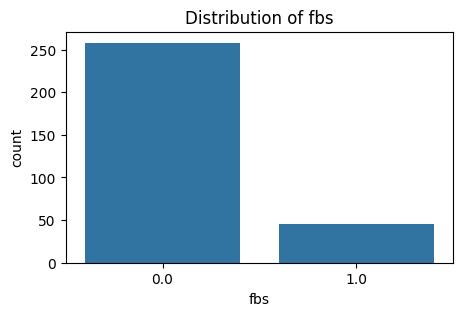

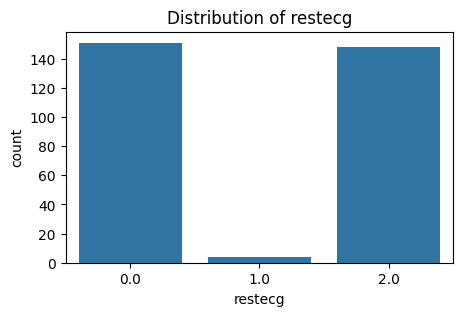

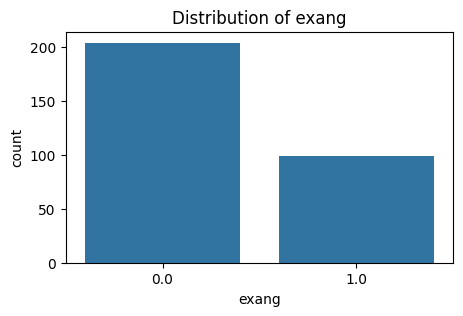

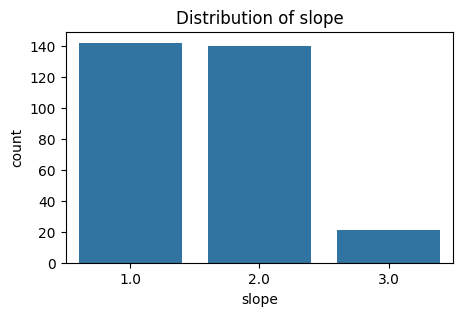

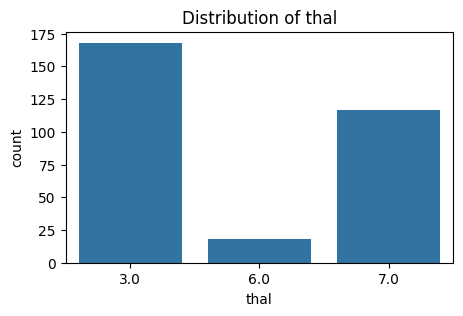

In [21]:

categorical_features = [
    "sex", "cp", "fbs", "restecg",
    "exang", "slope", "thal"
]

for col in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

#### Feature vs Target Relationships

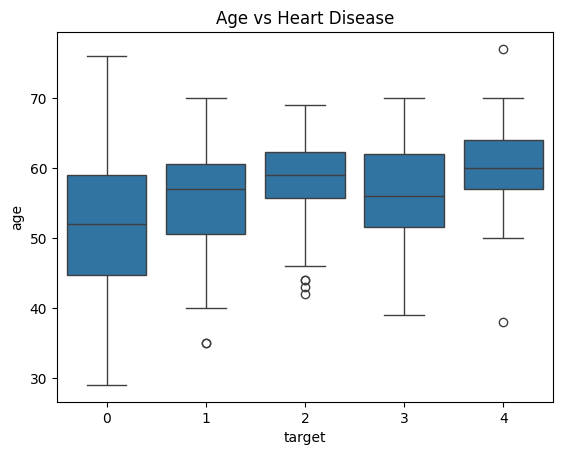

In [22]:
sns.boxplot(x="target", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

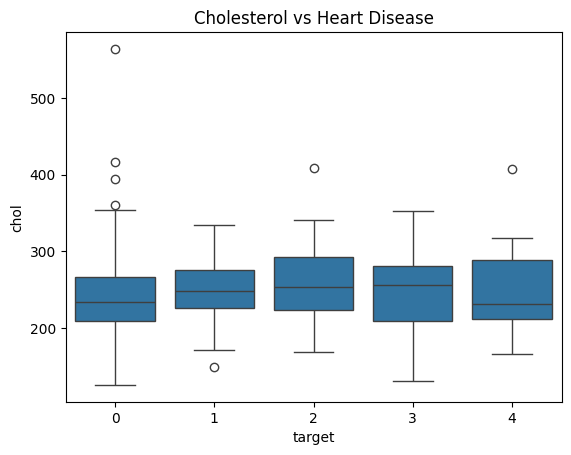

In [23]:


sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

<Axes: >

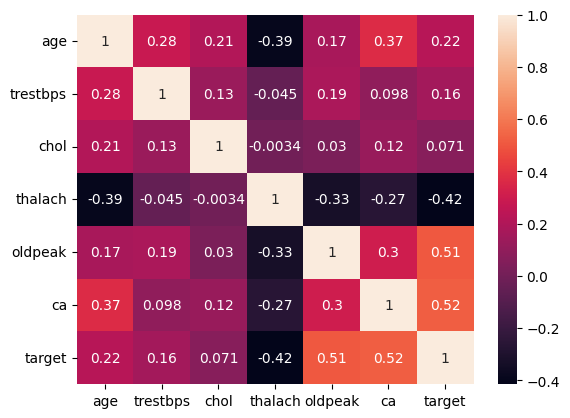

In [24]:
num_only = df[INTEGER_COLS]
sns.heatmap(num_only.corr(), annot=True)


#### Encode Categorical Features
####   --> Identify Categorical Columns